# Librerias

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
seed = 42

# Lectura

In [4]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

# Redes Neuronales

Preprocesado

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
min_max_scaler = MinMaxScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

for col in ['no_of_weekend_nights', 'year','day_of_week', 'no_of_special_requests']:
    min_max_scaler = MinMaxScaler()
    X_train_scaled[col] = min_max_scaler.fit_transform(X_train_scaled[[col]])
    X_test_scaled[col] = min_max_scaler.transform(X_test_scaled[[col]])

In [60]:
X_train_scaled.describe()

,no_of_weekend_nights,year,market_segment_type_Online,day_of_week,market_segment_type_other,no_of_special_requests,required_car_parking_space,avg_price_per_room_mm,repeated_guest,type_of_meal_plan_Not Selected,lead_time_transf,is_wknd
count,3599.00,3599.00,3599.00,3599.00,3599.00,3599.00,3599.00,3599.00,3599.00,3599.00,3599.00,3599.00
mean,0.12,0.82,0.66,0.51,0.05,0.16,0.03,0.50,0.02,0.15,0.00,0.44
std,0.13,0.39,0.47,0.35,0.22,0.20,0.16,0.17,0.13,0.36,1.00,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.99,0.00
25%,0.00,1.00,0.00,0.17,0.00,0.00,0.00,0.37,0.00,0.00,-0.78,0.00
50%,0.14,1.00,1.00,0.50,0.00,0.00,0.00,0.48,0.00,0.00,0.03,0.00
75%,0.29,1.00,1.00,0.83,0.00,0.25,0.00,0.60,0.00,0.00,0.76,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.89,1.00


In [61]:
X_test_scaled.describe()

,no_of_weekend_nights,year,market_segment_type_Online,day_of_week,market_segment_type_other,no_of_special_requests,required_car_parking_space,avg_price_per_room_mm,repeated_guest,type_of_meal_plan_Not Selected,lead_time_transf,is_wknd
count,900.00,900.00,900.00,900.00,900.00,900.00,900.00,900.00,900.00,900.00,900.00,900.00
mean,0.12,0.83,0.65,0.49,0.07,0.17,0.02,0.50,0.02,0.16,-0.00,0.43
std,0.12,0.37,0.48,0.35,0.25,0.20,0.12,0.17,0.14,0.36,1.00,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,-1.95,0.00
25%,0.00,1.00,0.00,0.17,0.00,0.00,0.00,0.37,0.00,0.00,-0.79,0.00
50%,0.14,1.00,1.00,0.50,0.00,0.00,0.00,0.48,0.00,0.00,0.07,0.00
75%,0.29,1.00,1.00,0.83,0.00,0.25,0.00,0.61,0.00,0.00,0.73,1.00
max,0.71,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.89,1.00


Modelo

In [55]:
param_grid = {
    "hidden_layer_sizes": [(i,) for i in range(3,100,5)] ,
    "learning_rate_init": [0.001, 0.01, 0.1, 0.5],
    "activation": ["identity", "tanh", "relu"],
}


kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_nn = GridSearchCV(MLPClassifier(random_state = seed)
                            ,param_grid=param_grid
                            ,scoring="roc_auc"
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_nn.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(3,), (8,), (13,), (18,), (23,),
                                                (28,), (33,), (38,), (43,),
                                                (48,), (53,), (58,), (63,),
                                                (68,), (73,), (78,), (83,),
                                                (88,), (93,), (98,)],
                         'learning_rate_init': [0.001, 0.01, 0.1, 0.5]},
             return_train_score=True, scoring='roc_auc')

In [56]:
print(f'Mejor modelo cuenta con parametros: {grid_search_nn.best_estimator_}')
print(f'El AUC es de: {round(grid_search_nn.best_score_,3)}')

Mejor modelo cuenta con parametros: MLPClassifier(hidden_layer_sizes=(78,), learning_rate_init=0.01,
              random_state=42)
El AUC es de: 0.881


In [75]:
grid_search_nn.best_estimator_.activation

'relu'

In [58]:
grid_search_nn.best_estimator_.learning_rate_init

0.01

In [84]:
grid_search_nn.best_estimator_.solver

'adam'

# Visualizacion de parametros

Train vs Test en validacion cruzada

In [76]:
hidden_layer_sizes_list = [i[0] for i in grid_search_nn.cv_results_['param_hidden_layer_sizes'].data]
learning_rate_init_list = list(grid_search_nn.cv_results_['param_learning_rate_init'].data)
activation_list = list(grid_search_nn.cv_results_['param_activation'].data)


mean_test_score_list = list(grid_search_nn.cv_results_['mean_test_score'])
mean_train_score_list = list(grid_search_nn.cv_results_['mean_train_score'])

nn_df = pd.DataFrame(list(zip(hidden_layer_sizes_list, learning_rate_init_list,activation_list, mean_train_score_list, mean_test_score_list)),
                                columns=['hidden_layer_sizes','learning_rate_init','activation', 'mean_train_score', 'mean_test_score'])

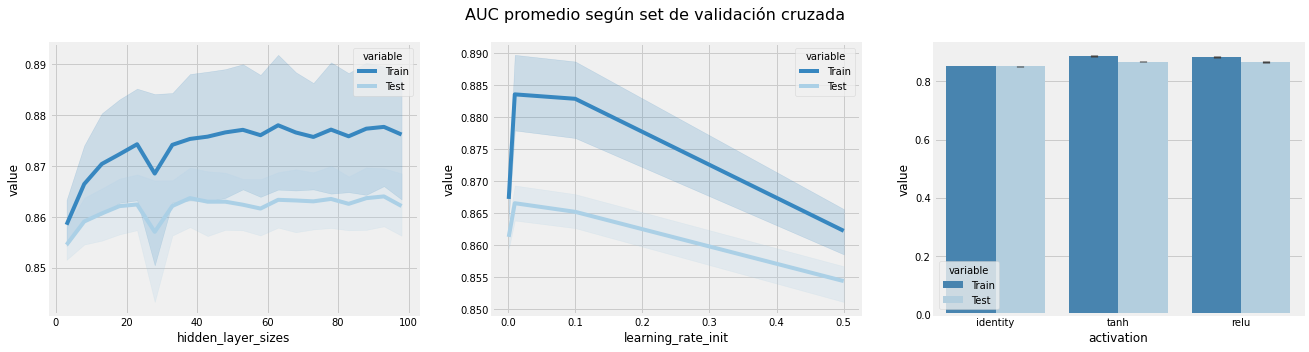

In [85]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
fig.suptitle("AUC promedio según set de validación cruzada", fontsize=16)

for i,param in enumerate(['hidden_layer_sizes','learning_rate_init','activation']):
    df_melt = nn_df.melt(id_vars=[param],value_vars= ['mean_train_score','mean_test_score'])
    df_melt.variable.replace({'mean_train_score':'Train',
                    'mean_test_score':'Test'},inplace=True)

    if param == 'activation':
        sns.barplot(data=df_melt, x=param, y="value", hue="variable" ,ax=axes[i],palette ='Blues_r')
    else:
        sns.lineplot(data=df_melt, x=param, y="value", hue="variable", ax=axes[i], palette ='Blues_r')

## Más metricas

In [86]:
results = cross_validate(
    grid_search_nn.best_estimator_,
    X_train_scaled,
    y_train,
    cv=kfold,
    scoring=['accuracy', 'precision', 'recall', "f1", "roc_auc"],
    return_train_score=False,
    n_jobs=-1
)

results_nn = pd.DataFrame(results)

In [87]:
mean_results = pd.DataFrame(results_nn.mean(axis=0), columns=['test_cv'])
mean_results

,test_cv
fit_time,0.11
score_time,0.01
test_accuracy,0.64
test_precision,0.62
test_recall,0.64
test_f1,0.50
test_roc_auc,0.81


In [12]:
mean_results.to_csv('../data/cv_results/nn.csv', index=False)

# Resultados test

In [89]:
preds = grid_search_nn.predict(X_test_scaled)
print(classification_report(y_test,preds))
print(roc_auc_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       603
           1       0.76      0.70      0.73       297

    accuracy                           0.83       900
   macro avg       0.81      0.79      0.80       900
weighted avg       0.82      0.83      0.82       900

0.7946127946127945


# Guardamos modelo y resultados

In [90]:
resultados_dict = {
    'AUC': roc_auc_score(y_test,preds),
    'Accuracy': accuracy_score(y_test,preds),
    'Recall': recall_score(y_test,preds),
    'Precision': precision_score(y_test,preds),
    'F1_score': f1_score(y_test,preds)
}

In [91]:
resultados = pd.DataFrame(resultados_dict,index=['Resultados en test']).T

In [92]:
resultados

,Resultados en test
AUC,0.79
Accuracy,0.83
Recall,0.70
Precision,0.76
F1_score,0.73


In [93]:
resultados.to_csv('../data/resultados/nn.csv',index=False)

In [94]:
import pickle
pickle.dump(grid_search_nn, open('../data/modelos/nn.pkl', 'wb'))